In [52]:
import random
from math import pi, cos, sin
import matplotlib.pyplot as plt

# Trabajo Práctico 1

## Ejercicio 1

a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2^32, multiplicador 1013904223, incremento de
1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [7]:
semilla = (99732 + 100687 + 99627 + 98625)//4

In [23]:
def gcl(estado_inicial):
    nuevo_estado = (1013904223 * estado_inicial + 1664525) % 2**32
    return nuevo_estado, nuevo_estado

b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [24]:
def gcl_reduce(estado_inicial):
    nuevo_estado, semilla_nueva = gcl(estado_inicial)
    return nuevo_estado/2**32, semilla_nueva

c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

In [25]:
def numeros_random(muestra, generador, semilla):
    estado_actual = semilla
    resultado = []
    for i in range(muestra):
        numero_random, estado_actual = generador(estado_actual)
        resultado.append(numero_random)
    return resultado

In [29]:
muestra = 50000
resultado_gcl = numeros_random(muestra, gcl, semilla)
resultado_gcl_reduce = numeros_random(muestra, gcl_reduce, semilla)

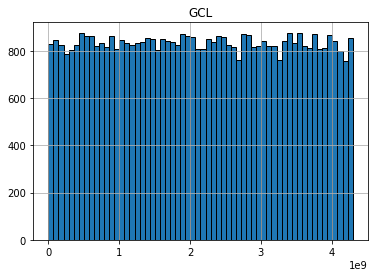

<Figure size 432x288 with 0 Axes>

In [30]:
plt.title('GCL')
plt.hist(resultado_gcl, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

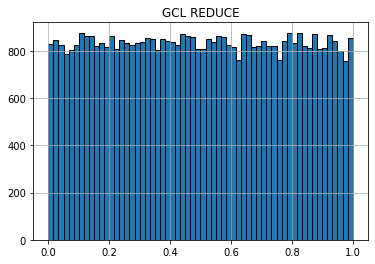

<Figure size 432x288 with 0 Axes>

In [31]:
plt.title('GCL REDUCE')
plt.hist(resultado_gcl_reduce, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

d) Basándose en el generador implementado en el ítem a, implemente el generador aditivo propuesto por Mitchell y Moore

```
𝑥𝑖+1 = ( 𝑥𝑖−24 + 𝑥𝑖−55) 𝑚𝑜𝑑 2^24
Donde 𝑥0,𝑥1, … , 𝑥54 son números arbitrarios no todos iguales.
```

In [36]:
def gen_mm(estados_previos):
    i = len(estados_previos)
    nuevo_estado = (estados_previos[i-24] + estados_previos[i-55])% 2**24
    estados_previos.append(nuevo_estado)
    return nuevo_estado, estados_previos

In [40]:
estados_iniciales = numeros_random(55, gcl, semilla)
resultado_gen_mm = numeros_random(muestra, gen_mm, estados_iniciales)

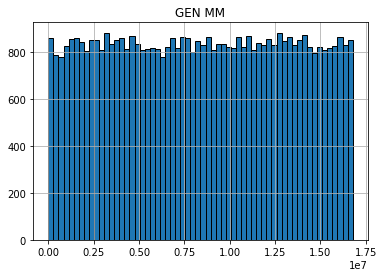

<Figure size 432x288 with 0 Axes>

In [41]:
plt.title('GEN MM')
plt.hist(resultado_gen_mm, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

## Ejercicio 2
Para cada uno de los generadores del ejercicio 1, proponer, y realizar, al menos 2 tests para evaluar su comportamiento. Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras.

# Ejercicio 3
Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes
generadores de números al azar:

a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

b) Alguno de los generadores de números al azar implementados con el algoritmo del ejercicio 1.

c) Calcule el factor de rendimiento del método.

In [45]:
def point_in_circle(c_x, c_y, r, gen):
    radio =  gen() % r
    theta = gen() * 2 * pi
    return c_x + cos(theta) * radio, c_y + sin(theta) * radio

In [44]:
random.seed(semilla)

In [63]:
# a
muestra = 100000
def python_random():
    result = []
    uniform = lambda: random.uniform(0,360)
    for i in range(muestra):
        result.append(point_in_circle(10,10,5,uniform))
    return result

In [64]:
result_python = python_random()

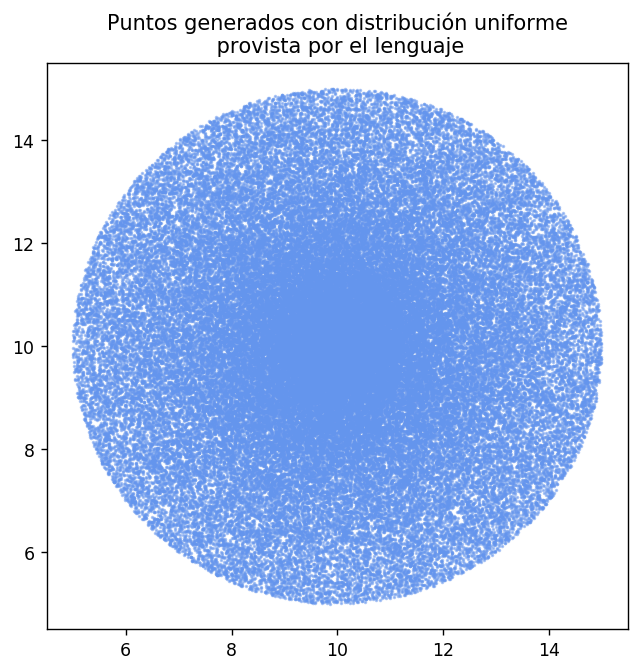

In [65]:
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in result_python], [p[1] for p in result_python], color="cornflowerblue", alpha=0.5, s=1)
plt.title("Puntos generados con distribución uniforme\n provista por el lenguaje")
plt.show()

In [66]:
# b
muestra = 100000

def glc_random():
    result = []
    estado_actual = semilla
    def gen_propio():
        numero_random, estado_actual = glc(estado_actual)
        return numero_random
    for i in range(muestra):
        result.append(point_in_circle(10,10,5,gen_propio))
    return result